In [ ]:
''' 
Задание 1 (7 баллов) 
1. Загрузите данные из файла «athlete_events.csv» о спортсменах – участниках 
олимпийских игр (ОИ). 
Данные содержат следующие признаки: 
ID – уникальный идентификатор спортсмена 
Name – имя спортсмена 
Sex – пол (M – мужской, F – женский) 
Age – возраст (полных лет, целое число) 
Height – рост в сантиметрах 
Weight – вес в килограммах 
Team – название команды (страны) 
NOC – трехбуквенное обозначение страны (по стандарту МОК) 
Games – год и вид ОИ (летние или зимние) 
Year – год проведения ОИ 
Season – вид ОИ (летние или зимние) 
City – город проведения ОИ 
Sport – вид спорта 
Event – соревнование (дисциплина) 
Medal – завоеванная медаль (Gold, Silver, Bronze или NA) 
2. Определите количество значений каждого из признаков в загруженных данных. По 
каким значениям имеются не все данные? По какому значению отсутствующих 
данных больше всего? Подсказка: воспользуйтесь функцией count или info.  
3. Выведите статистическую информацию (среднее значение, стандартное 
отклонение, минимальное и максимальное значение, значение квартилей) по 
полям: возраст, рост, вес. Подсказка: воспользуйтесь функцией describe. 
4. Ответьте на вопросы, написав соответствующий код 
1) Сколько лет было самому молодому участнику олимпийских игр в 1992 
году? Как звали этого участника и в какой дисциплине он(а) участвовал(а)? 
2) Выведите список всех видов спорта, которые когда-либо входили в 
программу олимпийских игр. (Каждый вид спорта должен присутствовать 
в списке один раз.) 
3) Каков средний рост теннисисток (пол – женский, вид спорта – большой 
теннис), участвовавших в играх 2000 года? 
4) Сколько золотых медалей в настольном теннисе выиграл Китай на ОИ в 
2008 году? 
5) Как изменилось количество видов спорта на летних ОИ в 2004 году по 
сравнению с летними ОИ в 1988 году? 
6) Постройте гистограмму распределения возраста мужчин-керлингистов 
(Sport == ‘Curling’), участвовавших в олимпиаде 2014 года. Подсказка: для 
построения гистограммы можно использовать функцию hist() из 
библиотеки matplotlib с параметрами по умолчанию (либо можете 
использовать любую другую функцию на свое усмотрение). 
7)  Рассмотрим зимнюю олимпиаду 2006 года. Сгруппируйте данные по стране 
(используйте признак «NOC») и посчитайте для каждой страны количество 
завоеванных медалей и средний возраст спортсменов. Выведите только те 
страны, которые завоевали хотя бы одну медаль. 
8) Продолжим рассматривать зимнюю олимпиаду 2006 года. Посчитайте, 
сколько медалей каждого достоинства завоевала каждая из стран-участниц 
(страны, не завоевавшие ни одной медали, можно не выводить). Для этого 
сгруппируйте данные по стране и по виду медали. Представьте данные в 
виде сводной таблицы (pivot_table). В сводной таблице не должно быть 
отсутствующих значений (NaN), замените их на 0. 
'''

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#1. Загрузите данные из файла «athlete_events.csv» о спортсменах – участниках олимпийских игр (ОИ). 
data = pd.read_csv('athlete_events.csv')

In [3]:
#2. Определите количество значений каждого из признаков в загруженных данных. По 
#каким значениям имеются не все данные? По какому значению отсутствующих 
#данных больше всего? Подсказка: воспользуйтесь функцией count или info. 
print('Информация о загруженных данных:')
print(data.info())

Информация о загруженных данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


In [ ]:
# Как видно из вывода сверху, максимальное количество значений в признаке 271116 значений.

In [4]:
# Количество значений по каждому признаку
value_counts = data.count()
print(f'Количество значений по каждому признаку:\n{value_counts}')

Количество значений по каждому признаку:
ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64


In [5]:
# Поиск признаков с отсутствующими данными
missing_data = data.isnull().sum()
print(f'Признаки, содержащие не все данные, и количество их пропусков:\n{missing_data[missing_data > 0]}')

Признаки, содержащие не все данные, и количество их пропусков:
Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64


In [6]:
# Признак с наибольшим количеством отсутствующих данных
most_missing = missing_data.idxmax()
print(f'Признак с наибольшим количеством отсутствующих данных: {most_missing}, количество пропусков: {missing_data[most_missing]}')

Признак с наибольшим количеством отсутствующих данных: Medal, количество пропусков: 231333


In [7]:
#3. Выведите статистическую информацию (среднее значение, стандартное 
#отклонение, минимальное и максимальное значение, значение квартилей) по 
#полям: возраст, рост, вес. Подсказка: воспользуйтесь функцией describe. 
stats = data[['Age', 'Height', 'Weight']].describe()
print(f'Статистическая информация:\n{stats}')

Статистическая информация:
                 Age         Height         Weight
count  261642.000000  210945.000000  208241.000000
mean       25.556898     175.338970      70.702393
std         6.393561      10.518462      14.348020
min        10.000000     127.000000      25.000000
25%        21.000000     168.000000      60.000000
50%        24.000000     175.000000      70.000000
75%        28.000000     183.000000      79.000000
max        97.000000     226.000000     214.000000


In [ ]:
'''
где:
count - количество непустых записей в столбце;
mean - среднее значение значений в столбце;
std - стандартное отклонение, показывает, как значения распределены;
min - минимальное значение в столбце;
25% - 25-й процентиль (Q1), означает, что 25% точек данных меньше этого значения;
50% - медианное значение (50-й процентиль), ниже которого находятся половины точек данных;
75% - 75-й процентиль (Q3), означает, что 75% точек данных ниже этого значения;
max - максимальное значение в столбце.
'''

In [ ]:
#4. Ответьте на вопросы, написав соответствующий код 

In [8]:
#1) Сколько лет было самому молодому участнику олимпийских игр в 1992 году? 
# Как звали этого участника и в какой дисциплине он(а) участвовал(а)?
youngest_1992 = data[(data['Year'] == 1992) & (data['Age'] == data[data['Year'] == 1992]['Age'].min())]
youngest_info = youngest_1992[['Name','Age', 'Event']]
print(f'Информация о самом молодом участнике олимпийских игр в 1992 году (имя, возраст, дисциплина):\n{youngest_info}')

Информация о самом молодом участнике олимпийских игр в 1992 году (имя, возраст, дисциплина):
                                  Name   Age                      Event
73461  Carlos Bienvenido Front Barrera  11.0  Rowing Men's Coxed Eights


In [9]:
#2) Выведите список всех видов спорта, которые когда-либо входили в 
#программу олимпийских игр. (Каждый вид спорта должен присутствовать 
#в списке один раз.) 
sports_list = data['Sport'].unique()
print(f'Список всех видов спорта, которые когда-либо входили в программу олимпийских игр: \n{sports_list}')

Список всех видов спорта, которые когда-либо входили в программу олимпийских игр: 
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [10]:
#3) Каков средний рост теннисисток (пол – женский, вид спорта – большой 
#теннис), участвовавших в играх 2000 года?
tennis_2000 = data[(data['Year'] == 2000) & (data['Sex'] == 'F') & (data['Sport'] == 'Tennis')]['Height'].mean()
print(f'Средний рост теннисисток, участвовавших в играх 2000 года: {tennis_2000} см.')

Средний рост теннисисток, участвовавших в играх 2000 года: 171.792 см.


In [11]:
#4) Сколько золотых медалей в настольном теннисе выиграл Китай на ОИ в 2008 году?
gold_medals_china_table_tennis_2008 = data[(data['NOC'] == 'CHN') & (data['Sport'] == 'Table Tennis') & (data['Year'] == 2008) & (data['Medal'] == 'Gold')]
people_gold_medals_china_table_tennis_2008 = gold_medals_china_table_tennis_2008[['Name', 'Team', 'NOC', 'Year', 'Sport', 'Event', 'Medal']]
count_gold_medals_china_table_tennis_2008 = gold_medals_china_table_tennis_2008.shape[0]
count2_gold_medals_china_table_tennis_2008 = people_gold_medals_china_table_tennis_2008['Event'].nunique()
print(f'На ОИ в 2008 году Китай выиграл в настольном теннисе {count2_gold_medals_china_table_tennis_2008} золотых медалей по дисциплинам, \
{count_gold_medals_china_table_tennis_2008} китайцев получили золотые медали:\n{people_gold_medals_china_table_tennis_2008}')
# Примечание: количество считается по человеку, т.е. если дициплина командная из 3 человек, то будет считаться 3 золотых медали, а не 1.
# То есть 8 челоовек получило золотые медали на ОИ в 2008 году в настольном теннисе, а Китай выиграл золотые медали в 4 дисциплинах настольного тениса (смотреть таблицу снизу)

На ОИ в 2008 году Китай выиграл в настольном теннисе 4 золотых медалей по дисциплинам, 8 китайцев получили золотые медали:
                Name   Team  NOC  Year         Sport  \
86741        Guo Yue  China  CHN  2008  Table Tennis   
144925        Ma Lin  China  CHN  2008  Table Tennis   
144926        Ma Lin  China  CHN  2008  Table Tennis   
256549      Wang Hao  China  CHN  2008  Table Tennis   
256666    Wang Liqin  China  CHN  2008  Table Tennis   
256711      Wang Nan  China  CHN  2008  Table Tennis   
269030  Zhang Yining  China  CHN  2008  Table Tennis   
269031  Zhang Yining  China  CHN  2008  Table Tennis   

                               Event Medal  
86741      Table Tennis Women's Team  Gold  
144925    Table Tennis Men's Singles  Gold  
144926       Table Tennis Men's Team  Gold  
256549       Table Tennis Men's Team  Gold  
256666       Table Tennis Men's Team  Gold  
256711     Table Tennis Women's Team  Gold  
269030  Table Tennis Women's Singles  Gold  
269031     T

In [12]:
#5) Как изменилось количество видов спорта на летних ОИ в 2004 году по 
#сравнению с летними ОИ в 1988 году?
# *Примечания: в условии 'летних ОИ', поэтому в условия добавил data['Season'] == 'Summer', хотя ОИ чередуют сезоны, впринципе можно не добавлять
count_sports_2004 = data[(data['Year'] == 2004) & (data['Season'] == 'Summer')]['Sport'].nunique()
count_sports_1988 = data[(data['Year'] == 1988) & (data['Season'] == 'Summer')]['Sport'].nunique()
if (count_sports_2004 > count_sports_1988):
    change_in_sports = count_sports_2004 - count_sports_1988
    print(f"Количество видов спорта на летних ОИ в 2004 году по сравнению с 1988 годом увеличилось на {change_in_sports}")
else:
    change_in_sports = count_sports_1988 - count_sports_2004
    print(f"Количество видов спорта на летних ОИ в 2004 году по сравнению с 1988 годом уменьшилось на {change_in_sports}")

Количество видов спорта на летних ОИ в 2004 году по сравнению с 1988 годом увеличилось на 7


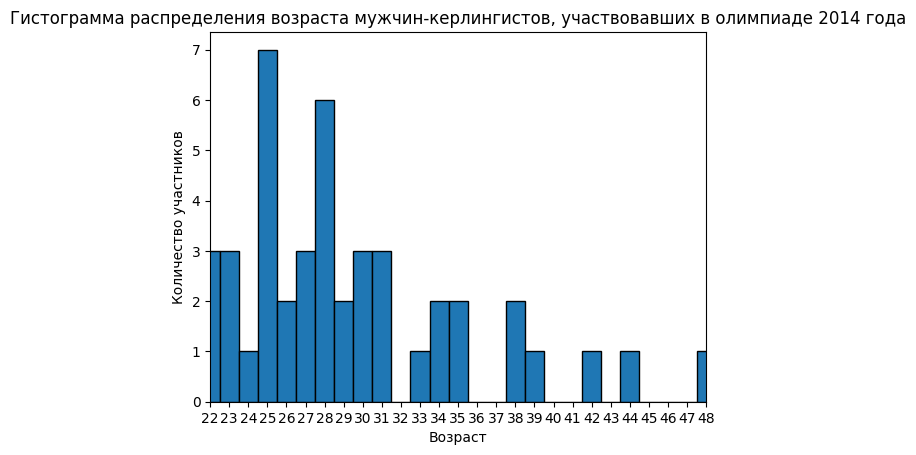

In [13]:
#6) Постройте гистограмму распределения возраста мужчин-керлингистов 
#(Sport == ‘Curling’), участвовавших в олимпиаде 2014 года. Подсказка: для 
#построения гистограммы можно использовать функцию hist() из 
#библиотеки matplotlib с параметрами по умолчанию (либо можете 
#использовать любую другую функцию на свое усмотрение).
# Примечание: для красивого вывода, настроил несколько параметров гистограммы (hist())
curling_men_2014 = data[(data['Sport'] == 'Curling') & (data['Year'] == 2014) & (data['Sex'] == 'M')]
plt.hist(curling_men_2014['Age'], bins=range(int(curling_men_2014['Age'].min()), int(curling_men_2014['Age'].max()) + 2), edgecolor='black', align='left')
plt.title('Гистограмма распределения возраста мужчин-керлингистов, участвовавших в олимпиаде 2014 года')
plt.xlabel('Возраст')
plt.ylabel('Количество участников')
plt.xlim(curling_men_2014['Age'].min(), curling_men_2014['Age'].max())
plt.xticks(range(int(curling_men_2014['Age'].min()), int(curling_men_2014['Age'].max()) + 1))
plt.show()

In [14]:
#7)  Рассмотрим зимнюю олимпиаду 2006 года. Сгруппируйте данные по стране 
#(используйте признак «NOC») и посчитайте для каждой страны количество 
#завоеванных медалей и средний возраст спортсменов. Выведите только те 
#страны, которые завоевали хотя бы одну медаль. 
# *Примечания: в условии 'зимнюю олимпиаду 2006', поэтому в условия можно добавить data['Season'] == 'Winter', хотя ОИ чередуют сезоны, 
# как и в 5 вопросе, здесь не стал добавлять
medals_country_2006 = data[data['Year'] == 2006].groupby('NOC').agg({'Medal': 'count', 'Age': 'mean'})
medals_country_2006 = medals_country_2006[medals_country_2006['Medal'] > 0]
print(f'Количество завоеванных медалей и средний возраст спортсменов зимней олимпиады 2006 года по странам:\n{medals_country_2006}')

Количество завоеванных медалей и средний возраст спортсменов зимней олимпиады 2006 года по странам:
     Medal        Age
NOC                  
AUS      2  25.711111
AUT     30  27.704545
BLR      1  27.142857
BUL      1  26.181818
CAN     69  25.481967
CHN     13  23.534247
CRO      3  22.760870
CZE     27  26.276471
EST      3  25.634921
FIN     41  26.614286
FRA     15  26.283019
GBR      1  26.851852
GER     54  27.376426
ITA     25  26.727586
JPN      1  26.515789
KOR     19  21.564706
LAT      1  26.380435
NED     13  25.873016
NOR     23  28.186335
POL      2  25.219780
RUS     41  25.784452
SUI     21  26.475138
SVK      1  25.517544
SWE     64  26.791667
UKR      3  25.614679
USA     52  25.818462


In [15]:
#8) Продолжим рассматривать зимнюю олимпиаду 2006 года. Посчитайте, 
#сколько медалей каждого достоинства завоевала каждая из стран-участниц 
#(страны, не завоевавшие ни одной медали, можно не выводить). Для этого 
#сгруппируйте данные по стране и по виду медали. Представьте данные в 
#виде сводной таблицы (pivot_table). В сводной таблице не должно быть 
#отсутствующих значений (NaN), замените их на 0. 
medals_count_2006_2 = data[data['Year'] == 2006].pivot_table(index='NOC', columns='Medal', aggfunc='size', fill_value=0)
print(f'Количество завоеванных медалей по типу на зимней олимпиады 2006 года по странам:\n{medals_count_2006_2}')

Количество завоеванных медалей по типу на зимней олимпиады 2006 года по странам:
Medal  Bronze  Gold  Silver
NOC                        
AUS         1     1       0
AUT         7    16       7
BLR         0     0       1
BUL         0     0       1
CAN        11    30      28
CHN         6     2       5
CRO         0     1       2
CZE        24     1       2
EST         0     3       0
FIN         7     0      34
FRA        10     3       2
GBR         0     0       1
GER         6    23      25
ITA        14    11       0
JPN         0     1       0
KOR         2    14       3
LAT         1     0       0
NED         8     3       2
NOR        12     2       9
POL         1     0       1
RUS        13    16      12
SUI         9     5       7
SVK         0     0       1
SWE         8    35      21
UKR         3     0       0
USA        32     9      11
